In [1]:
import pandas as pd
train_data = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/train.csv")
test_data = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/test.csv")

## Data

In [142]:
test_data['wind_production'][:24]

0     29.02
1     27.09
2     40.56
3     37.72
4     47.98
5     57.48
6     62.59
7     80.62
8     87.56
9     67.90
10    82.64
11    61.96
12    29.88
13    27.85
14    26.26
15    46.63
16    50.29
17    47.62
18    50.86
19    55.65
20    45.14
21    49.33
22    40.74
23    39.19
Name: wind_production, dtype: float64

In [2]:
solar_pred = [[-0.14003359],
              [-0.14023148],
              [-0.1369351 ],
              [-0.11980926],
              [-0.09181891],
              [-0.02490579],
              [ 0.12141681],
              [ 0.2901585 ],
              [ 0.450414  ],
              [ 2.895253  ],
              [ 6.3372884 ],
              [ 8.343027  ],
              [ 7.7494197 ],
              [ 4.958838  ],
              [ 1.5925043 ],
              [-0.0549603 ],
              [-0.11670585],
              [-0.07949446],
              [-0.06380647],
              [-0.0607301 ],
              [-0.06362987],
              [-0.07751703],
              [-0.10060202],
              [-0.13064025]]

wind_pred = [[21.672749],
        [21.674103],
        [21.674938],
        [21.674545],
        [21.67276 ],
        [21.672726],
        [21.672665],
        [21.67161 ],
        [21.670643],
        [21.670435],
        [21.670425],
        [21.670204],
        [21.670027],
        [21.66847 ],
        [21.668186],
        [21.667797],
        [21.667614],
        [21.66763 ],
        [21.667667],
        [21.667793],
        [21.667751],
        [21.66744 ],
        [21.668247],
        [21.668377]]

cons_pred = [[21.235817],
             [21.095211],
             [21.02509 ],
             [20.943832],
             [20.765182],
             [20.264671],
             [20.784483],
             [25.097683],
             [26.43015 ],
             [25.485878],
             [24.491543],
             [22.172632],
             [22.366474],
             [24.418633],
             [24.119953],
             [24.263506],
             [24.967003],
             [24.52063 ],
             [26.716553],
             [47.98756 ],
             [31.055717],
             [24.768633],
             [24.312298],
             [22.681938]]

## Load data

In [3]:
solar_pred = pd.DataFrame(solar_pred)
wind_pred = pd.DataFrame(wind_pred)
cons_pred = pd.DataFrame(cons_pred)

In [131]:
temp = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/train.csv")[:24]

In [143]:
data = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/test.csv")[:24]

# Renaming columns
data.rename(columns={'time': 'timestamp'}, inplace=True)
data.rename(columns={'consumption': 'actual_consumption'}, inplace=True)
data.rename(columns={'spot_market_price': 'electricity_price'}, inplace=True)

# Calculating total actual_production
data['actual_production'] = data['pv_production'] + data['wind_production']

# Dropping irrelevant columns
data = data[['timestamp', 'actual_consumption', 'actual_production', 'electricity_price', 'wind_production']]


# merging the predictions on the timestamp
# solar_predictions_df = models.XGBRegressor_solar()
# data = data.merge(solar_predictions_df, on='timestamp')


# the code below uses actual values for consumption and wind_production as placeholders until corresponding forecasts are ready

# receive data from model (dataframe with 24 values for consumption)
forecasted_solar_prod = solar_pred
forecasted_wind_prod = data['wind_production']
forecasted_consumption = cons_pred


# merge with main dataframe
data['forecasted_solar_prod'] = forecasted_solar_prod
data['forecasted_wind_prod'] = forecasted_wind_prod
data['forecasted_consumption'] = forecasted_consumption
data = data.drop(columns = 'wind_production')

In [24]:
data.head()

,timestamp,actual_consumption,actual_production,electricity_price,forecasted_solar_prod,forecasted_wind_prod,forecasted_consumption
0,2020-01-01 13:00:00,26.514689,40.59,0.28969,-0.140034,40.59,21.235817
1,2020-01-01 14:00:00,28.326960,67.86,0.29561,-0.140231,67.86,21.095211
2,2020-01-01 15:00:00,23.682207,116.68,0.30044,-0.136935,116.68,21.025090
3,2020-01-01 16:00:00,25.354782,120.22,0.29975,-0.119809,120.22,20.943832
4,2020-01-01 17:00:00,23.861942,109.86,0.29650,-0.091819,109.86,20.765182


In [144]:
def load_data():
    '''
    This function loads actual and forecasted production and consumption data for functions down below.
	•	The expected columns in data are:
	•	'timestamp': Date and time of each record.
	•	'actual_consumption': Measured consumption.
	•	'forecasted_consumption': Predicted consumption used for planning shifts.
	•	'actual_production': Measured production from sources like solar and wind.
	•	'forecasted_production': Predicted production.
	•	'electricity_price': Electricity price at each time period.
    '''

    # Importing data for testing period
    data = pd.read_csv("/Users/carlbechtolsheim/code/Niki827/watt_squad/raw_data/test.csv")[:24]

    # Renaming columns
    data.rename(columns={'time': 'timestamp'}, inplace=True)
    data.rename(columns={'consumption': 'actual_consumption'}, inplace=True)
    data.rename(columns={'spot_market_price': 'electricity_price'}, inplace=True)
    
    # Calculating total actual_production
    data['actual_production'] = data['pv_production'] + data['wind_production']
    
    # Dropping irrelevant columns
    data = data[['timestamp', 'actual_consumption', 'actual_production', 'electricity_price', 'wind_production']]
    
    
    # merging the predictions on the timestamp
    # solar_predictions_df = models.XGBRegressor_solar()
    # data = data.merge(solar_predictions_df, on='timestamp')
    
    
    # the code below uses actual values for consumption and wind_production as placeholders until corresponding forecasts are ready
    
    # receive data from model (dataframe with 24 values for consumption)
    forecasted_solar_prod = solar_pred
    forecasted_wind_prod = data['wind_production']
    forecasted_consumption = cons_pred
    
    
    # merge with main dataframe
    data['forecasted_solar_prod'] = forecasted_solar_prod
    data['forecasted_wind_prod'] = forecasted_wind_prod
    data['forecasted_consumption'] = forecasted_consumption
    data = data.drop(columns = 'wind_production')

    # creating forecasted_production column
    data['forecasted_production'] = data['forecasted_wind_prod'] + data['forecasted_solar_prod']
    data = data[['timestamp', 'actual_consumption', 'forecasted_consumption', 'actual_production', 'forecasted_production', 'electricity_price']]

    return data

In [399]:
def cost_saving(flexibility_degree):
    # 1. Load data
    data = load_data()

    # 2. Scale the predicted data to actual data
    consumption_scale_factor = data['actual_consumption'].sum() / data['forecasted_consumption'].sum()
    production_scale_factor = data['actual_production'].sum() / data['forecasted_production'].sum()
    data['adjusted_forecasted_consumption'] = data['forecasted_consumption'] * consumption_scale_factor
    data['adjusted_forecasted_production'] = data['forecasted_production'] * production_scale_factor

    # 3. Calculate excess based on scaled forecasts
    data['forecasted_excess'] = data['adjusted_forecasted_production'] - data['adjusted_forecasted_consumption']

    # 4. Initialize shifted consumption and calculate the initial excess after adjustment
    data['shifted_consumption'] = data['adjusted_forecasted_consumption'].copy()
    data['excess_after_shift'] = data['forecasted_production'] - data['shifted_consumption']

    # 5. Sort hours by forecasted excess
    deficit_hours = data.sort_values('forecasted_excess')
    excess_hours = data.sort_values('forecasted_excess', ascending=False)

    # 6. Shift consumption based on flexibility degree
    for i in range(len(deficit_hours)):
        #choose negative excess
        if deficit_hours['forecasted_excess'].iloc[i] < 0:
            #choose what to be shifted (if deficit is smaller than what you are willing to shift, you can shift all - Great!)
            needed_shift = min(
                -deficit_hours['forecasted_excess'].iloc[i], 
                flexibility_degree * deficit_hours['adjusted_forecasted_consumption'].iloc[i]
            )
            for j in range(len(excess_hours)):
                # Retrieve the initial available shift
                available_shift = excess_hours['forecasted_excess'].iloc[j]
                
                if available_shift > 0:
                    # Determine the shift amount (whichever is smaller: needed_shift or available_shift)
                    #Again: if needed shift is smaller than the available shift anyway, shift all - Great!
                    shift_amount = min(needed_shift, available_shift)
                    print(shift_amount)
                    print(needed_shift)
                    print(available_shift)
                    print ('------')
                    
                    # Adjust the shifted consumption in data DataFrame
                    data.loc[deficit_hours.index[i], 'shifted_consumption'] -= shift_amount
                    data.loc[excess_hours.index[j], 'shifted_consumption'] += shift_amount
                    
                    # Update the needed shift and available shift
                    needed_shift -= shift_amount
                    excess_hours.at[excess_hours.index[j], 'forecasted_excess'] -= shift_amount
                    
                    # If no more shift is needed, break out of the loop
                    if needed_shift <= 0:
                        break

    # 7. Update the excess after the shift
    data['excess_after_shift'] = data['adjusted_forecasted_production'] - data['shifted_consumption']

    # 8. What are the cost differences before and after shifting
    data['costs_no_shift'] = ((data['adjusted_forecasted_consumption'] - data['adjusted_forecasted_production']).clip(lower=0) 
                              * data['electricity_price'])
    data['costs_with_shift'] = ((data['shifted_consumption'] - data['adjusted_forecasted_production']).clip(lower=0) 
                                * data['electricity_price'])
    
    # 9. Apply color codes based on excess
    def assign_color(excess):
        if excess > 0:
            return 'green'
        elif excess == 0:
            return 'blue'
        else:
            return 'red'

    data['color_no_shift'] = data['forecasted_excess'].apply(assign_color)
    data['color_with_shift'] = data['excess_after_shift'].apply(assign_color)
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data[['timestamp', 'adjusted_forecasted_consumption', 'adjusted_forecasted_production', 
                 'forecasted_excess', 'shifted_consumption', 'excess_after_shift', 'costs_no_shift', 
                 'costs_with_shift', 'color_no_shift', 'color_with_shift']]

    costs_no_shift = data['costs_no_shift'].sum()
    costs_with_shift = data['costs_with_shift'].sum()

    return data, costs_no_shift, costs_with_shift


In [400]:
data, costs_no_shift, costs_with_shift = cost_saving(0.5)

28.89164806772728
28.89164806772728
48.33204261458598
------
14.61367963717619
14.61367963717619
19.4403945468587
------
4.826714909682508
10.085356534577329
4.826714909682508
------
5.258641624894821
5.258641624894821
43.821289546979365
------
9.995155188525509
9.995155188525509
38.562647922084544
------
9.225311786003175
9.225311786003175
28.567492733559035
------
8.330620844470872
8.330620844470872
19.34218094755586
------
1.6530417714486276
1.6530417714486276
11.011560103084989
------
1.2682710498845182
1.2682710498845182
9.358518331636361
------
0.35028718507833645
0.35028718507833645
8.090247281751843
------


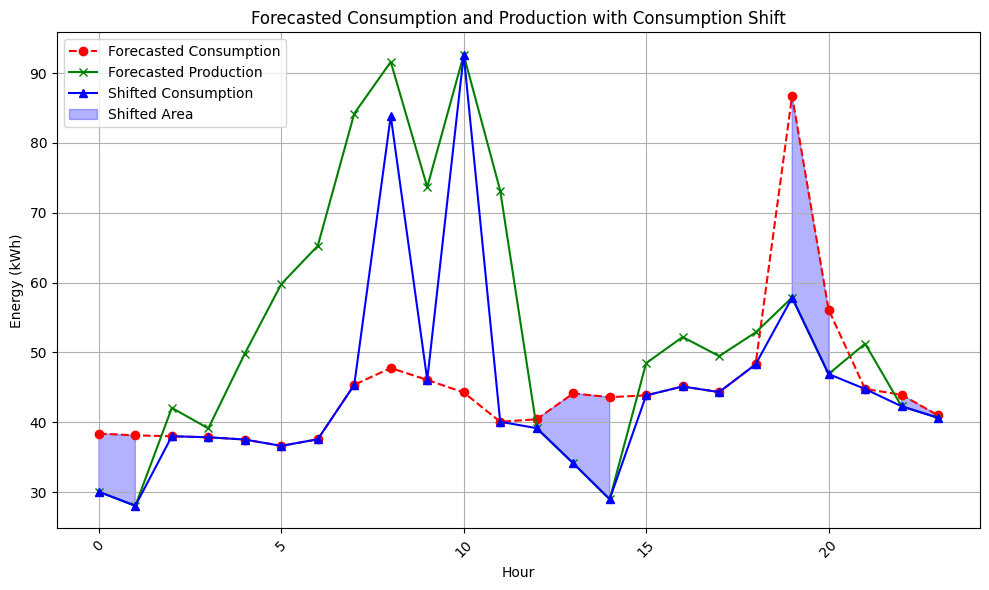

In [407]:
# Convert timestamp to number of hours since the first timestamp
data['hour'] = (data['timestamp'] - data['timestamp'].min()).dt.total_seconds() / 3600

# Plotting
plt.figure(figsize=(10, 6))

# Plotting forecasted consumption and production
plt.plot(data['hour'], data['adjusted_forecasted_consumption'], label='Forecasted Consumption', color='red', linestyle='--', marker='o')
plt.plot(data['hour'], data['adjusted_forecasted_production'], label='Forecasted Production', color='green', linestyle='-', marker='x')

# Plotting shifted consumption
plt.plot(data['hour'], data['shifted_consumption'], label='Shifted Consumption', color='blue', linestyle='-', marker='^')

# Highlight the areas where consumption was shifted (optional)
shifted_consumption = data['shifted_consumption'] < data['adjusted_forecasted_consumption']
plt.fill_between(data['hour'], data['adjusted_forecasted_consumption'], data['shifted_consumption'], where=shifted_consumption, color='blue', alpha=0.3, label="Shifted Area")

# Adding labels and title
plt.title("Forecasted Consumption and Production with Consumption Shift")
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.legend()

# Display plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

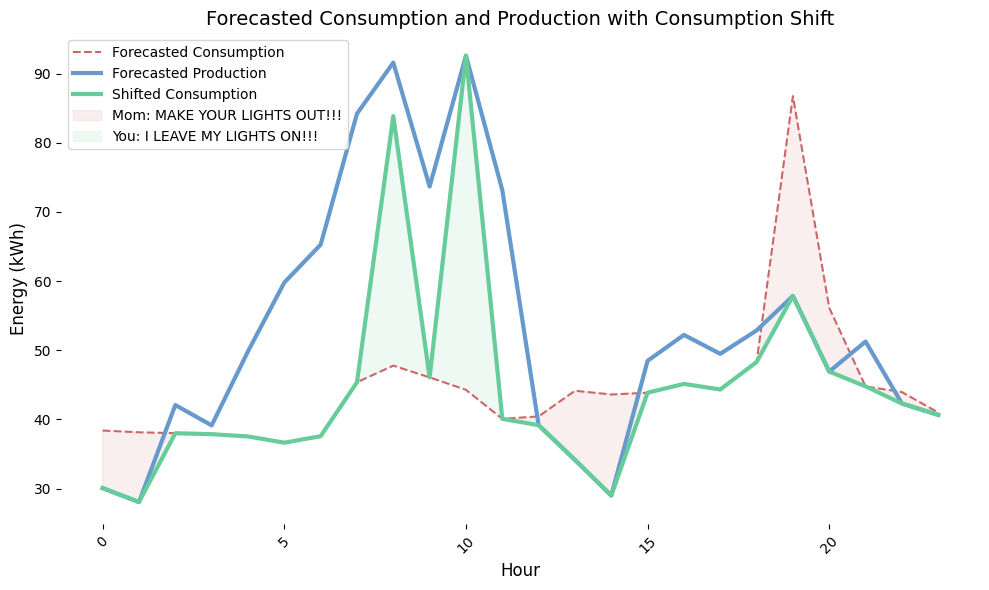

In [442]:
# Convert timestamp to number of hours since the first timestamp
data['hour'] = (data['timestamp'] - data['timestamp'].min()).dt.total_seconds() / 3600

# Plotting
plt.figure(figsize=(10, 6))

# Plotting forecasted consumption and production
plt.plot(data['hour'], data['adjusted_forecasted_consumption'], label='Forecasted Consumption', color='#CC6666', linestyle='--')
plt.plot(data['hour'], data['adjusted_forecasted_production'], label='Forecasted Production', color='#6699CC', linestyle='-', linewidth=3) # #66CC99

# Plotting shifted consumption
plt.plot(data['hour'], data['shifted_consumption'], label='Shifted Consumption', color='#66CC99', linestyle='-', linewidth=3)

# Highlight the areas where consumption was shifted (optional)
shifted_consumption_less = data['shifted_consumption'] <= data['adjusted_forecasted_consumption']
plt.fill_between(data['hour'], data['adjusted_forecasted_consumption'], data['shifted_consumption'], where=shifted_consumption_less, color='#CC6666', alpha=0.1, label="Mom: MAKE YOUR LIGHTS OUT!!!")

shifted_consumption_more = data['shifted_consumption'] >= data['adjusted_forecasted_consumption']
plt.fill_between(data['hour'], data['shifted_consumption'], data['adjusted_forecasted_consumption'], where=shifted_consumption_more, color='#66CC99', alpha=0.1, label="You: I LEAVE MY LIGHTS ON!!!")


plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding labels and title
plt.title("Forecasted Consumption and Production with Consumption Shift", fontsize = 14)
plt.xlabel('Hour', fontsize = 12)
plt.ylabel('Energy (kWh)', fontsize = 12)
plt.legend()

# Display plot
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

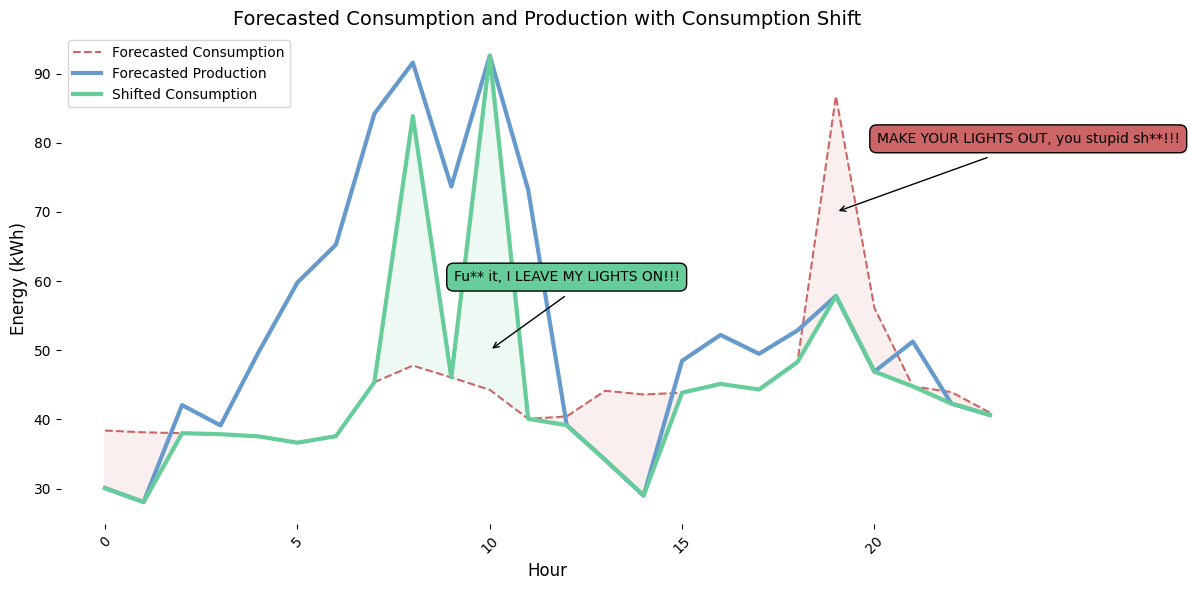

In [462]:
import matplotlib.pyplot as plt

# Assuming 'data' and other code are defined above
# Plotting
plt.figure(figsize=(12, 6))

# Plotting forecasted consumption and production
plt.plot(data['hour'], data['adjusted_forecasted_consumption'], label='Forecasted Consumption', color='#CC6666', linestyle='--')
plt.plot(data['hour'], data['adjusted_forecasted_production'], label='Forecasted Production', color='#6699CC', linestyle='-', linewidth=3)

# Plotting shifted consumption
plt.plot(data['hour'], data['shifted_consumption'], label='Shifted Consumption', color='#66CC99', linestyle='-', linewidth=3)

# Highlight the areas where consumption was shifted
shifted_consumption_less = data['shifted_consumption'] <= data['adjusted_forecasted_consumption']
plt.fill_between(data['hour'], data['adjusted_forecasted_consumption'], data['shifted_consumption'], where=shifted_consumption_less, color='#CC6666', alpha=0.1)

shifted_consumption_more = data['shifted_consumption'] >= data['adjusted_forecasted_consumption']
plt.fill_between(data['hour'], data['shifted_consumption'], data['adjusted_forecasted_consumption'], where=shifted_consumption_more, color='#66CC99', alpha=0.1)

# Adding speaking bubbles using text
plt.text(x=12, y=60, s="Fu** it, I LEAVE MY LIGHTS ON!!!", fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='#66CC99', edgecolor='black', boxstyle="round,pad=0.5"))
# Line from the green shaded area to the text box
plt.annotate('', xy=(10, 50), xytext=(12, 58),
             arrowprops=dict(arrowstyle="->", color='black', lw=1))

plt.text(x=24, y=80, s="MAKE YOUR LIGHTS OUT, you stupid sh**!!!", fontsize=10, color='black', ha='center',
         bbox=dict(facecolor='#CC6666', edgecolor='black', boxstyle="round,pad=0.5"))
# Line from the green shaded area to the text box
plt.annotate('', xy=(19, 70), xytext=(23, 78),
             arrowprops=dict(arrowstyle="->", color='black', lw=1))


# Customize the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# Adding labels and title
plt.title("Forecasted Consumption and Production with Consumption Shift", fontsize=14)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Energy (kWh)', fontsize=12)
plt.legend()

# Display plot
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()


In [379]:
data = load_data()

In [380]:
consumption_scale_factor = data['actual_consumption'].sum() / data['forecasted_consumption'].sum()
production_scale_factor = data['actual_production'].sum() / data['forecasted_production'].sum()


data['adjusted_forecasted_consumption'] = data['forecasted_consumption'] * consumption_scale_factor
data['adjusted_forecasted_production'] = data['forecasted_production'] * production_scale_factor

In [381]:
# Step 2: Calculate excess based on scaled forecasts
data['forecasted_excess'] = data['adjusted_forecasted_production'] - data['adjusted_forecasted_consumption']

In [382]:
# Step 3: Initialize shifted consumption and calculate the initial excess after adjustment
data['shifted_consumption'] = data['adjusted_forecasted_consumption'].copy()
data['excess_after_shift'] = data['forecasted_production'] - data['shifted_consumption']

In [383]:
# Step 4: Sort hours by forecasted excess
deficit_hours = data.sort_values('forecasted_excess')
excess_hours = data.sort_values('forecasted_excess', ascending=False)

In [384]:

# Step 5: Shift consumption based on flexibility degree
for i in range(len(deficit_hours)):
    if deficit_hours['forecasted_excess'].iloc[i] < 0:
        needed_shift = min(
            -deficit_hours['forecasted_excess'].iloc[i], 
            0.5 * deficit_hours['adjusted_forecasted_consumption'].iloc[i]
        )
        for j in range(len(excess_hours)):
            # Retrieve the initial available shift
            available_shift = excess_hours['forecasted_excess'].iloc[j]
            
            if available_shift > 0:
                # Determine the shift amount (whichever is smaller: needed_shift or available_shift)
                shift_amount = min(needed_shift, available_shift)
                print(shift_amount)
                print(needed_shift)
                print(available_shift)
                print ('------')
                
                # Adjust the shifted consumption in both deficit and excess DataFrames
                data.loc[deficit_hours.index[i], 'shifted_consumption'] -= shift_amount
                data.loc[excess_hours.index[j], 'shifted_consumption'] += shift_amount
                
                # Update the needed shift and available shift
                needed_shift -= shift_amount
                excess_hours.at[excess_hours.index[j], 'forecasted_excess'] -= shift_amount
                
                # If no more shift is needed, break out of the loop
                if needed_shift <= 0:
                    break
            


28.89164806772728
28.89164806772728
48.33204261458598
------
14.61367963717619
14.61367963717619
19.4403945468587
------
4.826714909682508
10.085356534577329
4.826714909682508
------
5.258641624894821
5.258641624894821
43.821289546979365
------
9.995155188525509
9.995155188525509
38.562647922084544
------
9.225311786003175
9.225311786003175
28.567492733559035
------
8.330620844470872
8.330620844470872
19.34218094755586
------
1.6530417714486276
1.6530417714486276
11.011560103084989
------
1.2682710498845182
1.2682710498845182
9.358518331636361
------
0.35028718507833645
0.35028718507833645
8.090247281751843
------


In [215]:
# Step 5: Shift consumption based on flexibility degree
for i in range(len(deficit_hours)):
    if deficit_hours['forecasted_excess'].iloc[i] < 0:
        needed_shift = min(
            -deficit_hours['forecasted_excess'].iloc[i], 
            0.5 * deficit_hours['adjusted_forecasted_consumption'].iloc[i]
        )
        for j in range(len(excess_hours)):
            available_shift = excess_hours['forecasted_excess'].iloc[j]
            
            if available_shift > 0:
                shift_amount = min(needed_shift, available_shift)
                print(needed_shift)
                print(available_shift)
                data.loc[deficit_hours.index[i], 'shifted_consumption'] -= shift_amount
                data.loc[excess_hours.index[j], 'shifted_consumption'] += shift_amount
                needed_shift -= shift_amount
                available_shift -= shift_amount
                if needed_shift <= 0:
                    break

28.89164806772728
48.33204261458598
14.61367963717619
48.33204261458598
10.085356534577329
48.33204261458598
9.995155188525509
48.33204261458598
9.225311786003175
48.33204261458598
8.330620844470872
48.33204261458598
1.6530417714486276
48.33204261458598
1.2682710498845182
48.33204261458598
0.35028718507833645
48.33204261458598


In [385]:
data['excess_after_shift'] = data['adjusted_forecasted_production'] - data['shifted_consumption']
data['costs_no_shift'] = ((data['adjusted_forecasted_consumption'] - data['adjusted_forecasted_production']).clip(lower=0) 
                          * data['electricity_price'])
data['costs_with_shift'] = ((data['shifted_consumption'] - data['adjusted_forecasted_production']).clip(lower=0) 
                            * data['electricity_price'])

In [386]:
# Step 7: Apply color codes based on excess
def assign_color(excess):
    if excess > 0:
        return 'green'
    elif excess == 0:
        return 'blue'
    else:
        return 'red'

data['color_no_shift'] = data['forecasted_excess'].apply(assign_color)
data['color_with_shift'] = data['excess_after_shift'].apply(assign_color)

In [387]:
data['shifted_consumption'].sum()

1070.11516665

In [388]:
data['adjusted_forecasted_consumption'].sum()

1070.11516665

In [389]:
data['forecasted_excess'].sum()

203.6917995499998

In [390]:
data['excess_after_shift'].sum()

203.6917995499998

In [391]:
data['costs_no_shift'].sum()

55.037474349681474

In [392]:
data['costs_with_shift'].sum()

0.0

In [125]:
import matplotlib.pyplot as plt

In [310]:
file_path = '/Users/carlbechtolsheim/temp.csv'
data.to_csv(file_path, index=False)

In [393]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

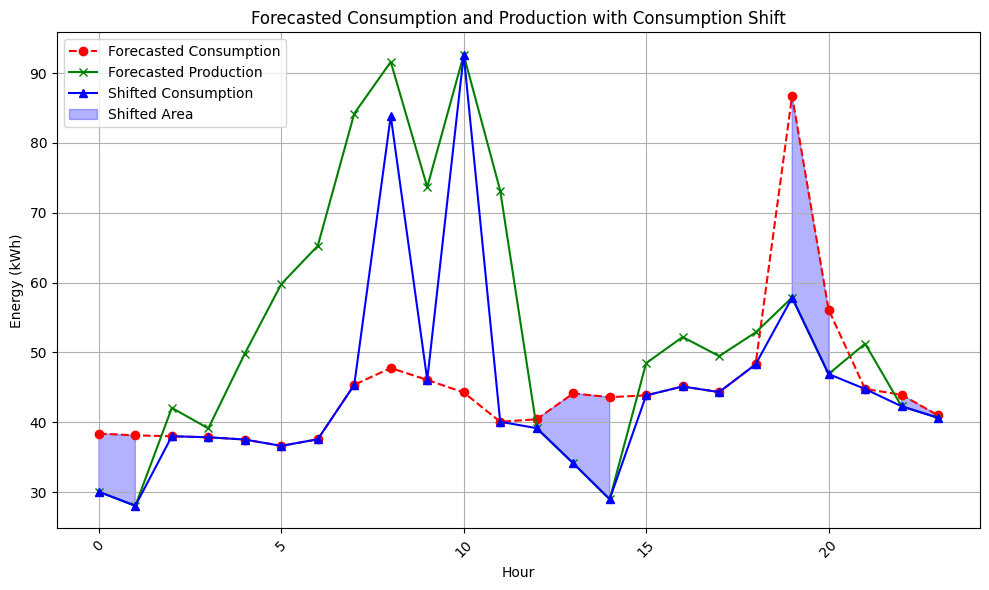

In [378]:
# Convert timestamp to number of hours since the first timestamp
data['hour'] = (data['timestamp'] - data['timestamp'].min()).dt.total_seconds() / 3600

# Plotting
plt.figure(figsize=(10, 6))

# Plotting forecasted consumption and production
plt.plot(data['hour'], data['adjusted_forecasted_consumption'], label='Forecasted Consumption', color='red', linestyle='--', marker='o')
plt.plot(data['hour'], data['adjusted_forecasted_production'], label='Forecasted Production', color='green', linestyle='-', marker='x')

# Plotting shifted consumption
plt.plot(data['hour'], data['shifted_consumption'], label='Shifted Consumption', color='blue', linestyle='-', marker='^')

# Highlight the areas where consumption was shifted (optional)
shifted_consumption = data['shifted_consumption'] < data['adjusted_forecasted_consumption']
plt.fill_between(data['hour'], data['adjusted_forecasted_consumption'], data['shifted_consumption'], where=shifted_consumption, color='blue', alpha=0.3, label="Shifted Area")

# Adding labels and title
plt.title("Forecasted Consumption and Production with Consumption Shift")
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.legend()

# Display plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


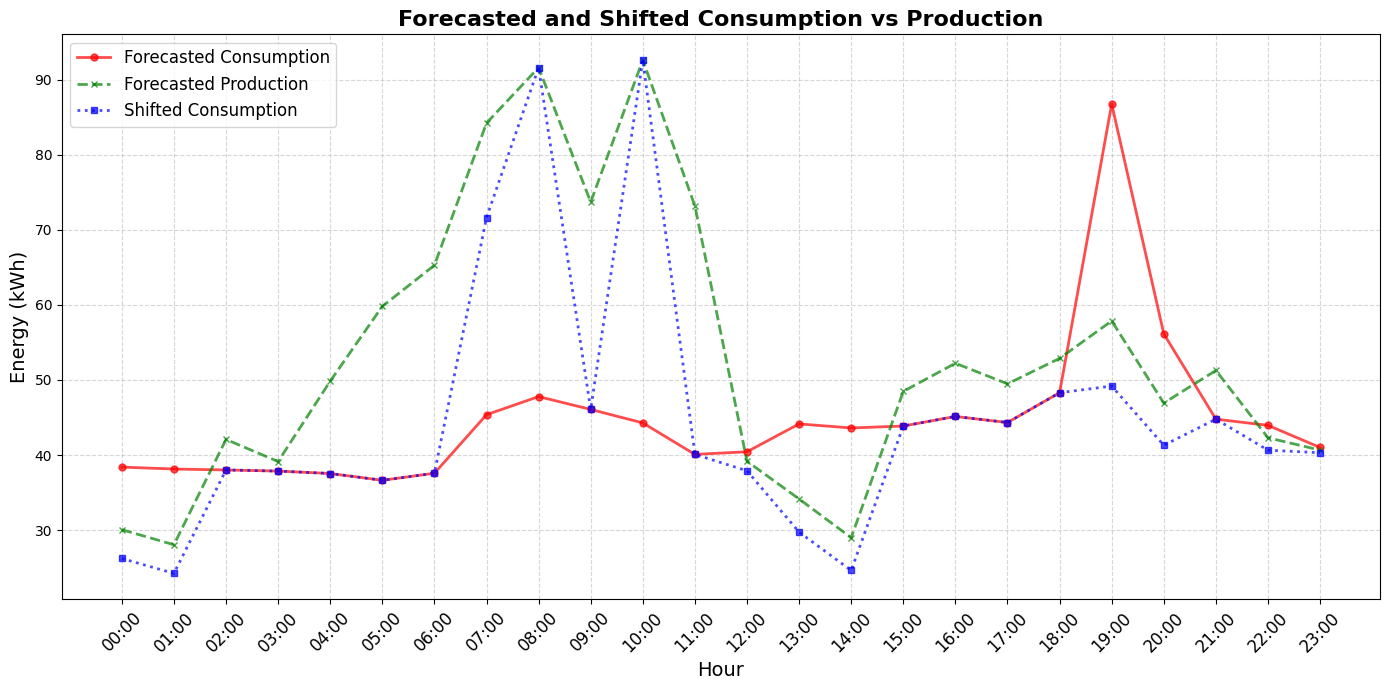

In [337]:
import matplotlib.pyplot as plt

# Assuming 'result_df' is already created and contains the required columns

plt.figure(figsize=(14, 7))

# Plot the forecasted consumption (with a solid line)
plt.plot(data['hour'], data['adjusted_forecasted_consumption'], label='Forecasted Consumption', color='red', linewidth=2, marker='o', markersize=5, linestyle='-', alpha=0.7)

# Plot the forecasted production (with a dashed line)
plt.plot(data['hour'], data['adjusted_forecasted_production'], label='Forecasted Production', color='green', linewidth=2, marker='x', markersize=5, linestyle='--', alpha=0.7)

# Plot the shifted consumption (with a dotted line)
plt.plot(data['hour'], data['shifted_consumption'], label='Shifted Consumption', color='blue', linewidth=2, marker='s', markersize=5, linestyle=':', alpha=0.7)

# Adding labels and title
plt.title("Forecasted and Shifted Consumption vs Production", fontsize=16, fontweight='bold')
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Energy (kWh)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Adding the x-axis labels (timestamps in HH:MM format)
plt.xticks(data['hour'], data['timestamp'].dt.strftime('%H:%M'), rotation=45, fontsize=12)

# Tighten the layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [94]:
data.head(8)

,timestamp,actual_consumption,forecasted_consumption,actual_production,forecasted_production,electricity_price,adjusted_forecasted_consumption,adjusted_forecasted_production,forecasted_excess,shifted_consumption,excess_after_shift
0,2021-02-01 00:00:00,37.731253,21.235817,29.02,28.879966,0.42572,38.388312,30.057691,-8.330621,38.388312,-9.508345
1,2021-02-01 01:00:00,39.288933,21.095211,27.09,26.949769,0.42531,38.134136,28.048779,-10.085357,38.134136,-11.184367
2,2021-02-01 02:00:00,37.472487,21.025090,40.56,40.423065,0.41575,38.007377,42.071516,4.064139,38.007377,2.415688
3,2021-02-01 03:00:00,37.343327,20.943832,37.72,37.600191,0.42344,37.860486,39.133526,1.273040,37.860486,-0.260295
4,2021-02-01 04:00:00,38.386463,20.765182,47.98,47.888181,0.50187,37.537537,49.841060,12.303522,37.537537,10.350644
5,2021-02-01 05:00:00,40.329423,20.264671,57.48,57.455094,0.61728,36.632756,59.798111,23.165355,36.632756,20.822338
6,2021-02-01 06:00:00,45.685833,20.784483,62.59,62.711417,0.89559,37.572428,65.268787,27.696359,37.572428,25.138989
7,2021-02-01 07:00:00,45.153127,25.097683,80.62,80.910159,2.07708,45.369466,84.209673,38.840207,45.369466,35.540693


In [12]:
import pandas as pd

def cost_saving_shift(data: pd.DataFrame, flexibility_degree: float) -> pd.DataFrame:

    
    # Step 1: Scale forecasted consumption and production to match actual totals
    consumption_scale_factor = data['actual_consumption'].sum() / data['forecasted_consumption'].sum()
    production_scale_factor = data['actual_production'].sum() / data['forecasted_production'].sum()
    
    data['adjusted_forecasted_consumption'] = data['forecasted_consumption'] * consumption_scale_factor
    data['adjusted_forecasted_production'] = data['forecasted_production'] * production_scale_factor

    # Step 2: Calculate excess based on scaled forecasts
    data['forecasted_excess'] = data['adjusted_forecasted_production'] - data['adjusted_forecasted_consumption']

    # Step 3: Initialize shifted consumption and calculate initial excess after adjustment
    data['shifted_consumption'] = data['adjusted_forecasted_consumption'].copy()
    data['excess_after_shift'] = data['adjusted_forecasted_production'] - data['shifted_consumption']
    
    # Step 4: Sort hours by forecasted excess
    deficit_hours = data.sort_values('forecasted_excess')
    excess_hours = data.sort_values('forecasted_excess', ascending=False)
    
    # Step 5: Shift consumption based on flexibility degree
    for i in range(len(deficit_hours)):
        if deficit_hours['forecasted_excess'].iloc[i] < 0:
            needed_shift = min(
                -deficit_hours['forecasted_excess'].iloc[i], 
                flexibility_degree * deficit_hours['adjusted_forecasted_consumption'].iloc[i]
            )
            for j in range(len(excess_hours)):
                available_shift = excess_hours['forecasted_excess'].iloc[j]
                if available_shift > 0:
                    shift_amount = min(needed_shift, available_shift)
                    deficit_hours.loc[deficit_hours.index[i], 'shifted_consumption'] -= shift_amount
                    excess_hours.loc[excess_hours.index[j], 'shifted_consumption'] += shift_amount
                    needed_shift -= shift_amount
                    if needed_shift <= 0:
                        break
    
    # Step 6: Update excess after shift and calculate costs
    data['excess_after_shift'] = data['adjusted_forecasted_production'] - data['shifted_consumption']
    data['costs_no_shift'] = ((data['adjusted_forecasted_consumption'] - data['adjusted_forecasted_production']).clip(lower=0) 
                              * data['electricity_price'])
    data['costs_with_shift'] = ((data['shifted_consumption'] - data['adjusted_forecasted_production']).clip(lower=0) 
                                * data['electricity_price'])
    
    # Step 7: Apply color codes based on excess
    def assign_color(excess):
        if excess > 0:
            return 'green'
        elif excess == 0:
            return 'blue'
        else:
            return 'red'

    data['color_no_shift'] = data['forecasted_excess'].apply(assign_color)
    data['color_with_shift'] = data['excess_after_shift'].apply(assign_color)
    
    return data

# Usage example:
# result_df = cost_saving_shift(input_df, flexibility_degree=0.2)
# print(result_df)


In [40]:
cost_saving_shift(data, 0.5)

,timestamp,actual_consumption,forecasted_consumption,actual_production,forecasted_production,electricity_price,forecasted_excess,adjusted_forecasted_consumption,shifted_consumption,excess_after_shift,costs_no_shift,costs_with_shift,color_no_shift,color_with_shift
0,2021-02-01 00:00:00,37.731253,21.235817,29.020000,28.879966,0.42572,7.644149,38.388312,38.388312,-9.508345,0.0,4.047893,green,red
1,2021-02-01 01:00:00,39.288933,21.095211,27.090000,26.949769,0.42531,5.854558,38.134136,38.134136,-11.184367,0.0,4.756823,green,red
2,2021-02-01 02:00:00,37.472487,21.025090,40.560000,40.423065,0.41575,19.397975,38.007377,38.007377,2.415688,0.0,0.000000,green,green
3,2021-02-01 03:00:00,37.343327,20.943832,37.720000,37.600191,0.42344,16.656359,37.860486,37.860486,-0.260295,0.0,0.110219,green,red
4,2021-02-01 04:00:00,38.386463,20.765182,47.980000,47.888181,0.50187,27.122999,37.537537,37.537537,10.350644,0.0,0.000000,green,green
5,2021-02-01 05:00:00,40.329423,20.264671,57.480000,57.455094,0.61728,37.190423,36.632756,36.632756,20.822338,0.0,0.000000,green,green
6,2021-02-01 06:00:00,45.685833,20.784483,62.590000,62.711417,0.89559,41.926934,37.572428,37.572428,25.138989,0.0,0.000000,green,green
7,2021-02-01 07:00:00,45.153127,25.097683,80.620000,80.910159,2.07708,55.812476,45.369466,45.369466,35.540693,0.0,0.000000,green,green
8,2021-02-01 08:00:00,51.127027,26.430150,88.631833,88.010414,1.72231,61.580264,47.778187,47.778187,40.232227,0.0,0.000000,green,green
9,2021-02-01 09:00:00,49.200760,25.485878,74.903250,70.795253,1.30417,45.309375,46.071212,46.071212,24.724041,0.0,0.000000,green,green
